[Pandas Documentation](https://pandas.pydata.org/docs/)

[Are dog size and intelligence linked?](https://data.world/sharon/what-is-the-correlation-between-dog-size-and-intelligence)

[Wikipedia: The Intelligence of Dogs](https://en.m.wikipedia.org/wiki/The_Intelligence_of_Dogs#cite_ref-ReferenceA_18-0)

[Pandas: groupby](https://youtu.be/qy0fDqoMJx8)

In [9]:
import pandas as pd
from IPython.display import display
# import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt


df_dog_breeds:  (117, 8)
df_dog_intell_size:  (93, 9)
df_dog_data:  (73, 16)

Index(['Breed', 'Country of Origin', 'Fur Color', 'Color of Eyes', 'Longevity',
       'Character Traits', 'Common Health Problems', 'Classification', 'obey',
       'reps_min', 'reps_max', 'height_min', 'height_max', 'weight_min',
       'weight_max'],
      dtype='object')

21.376712328767123

Classification
Above Average Working Dogs    20.421053
Average Working               23.055556
Brightest Dogs                22.111111
Excellent Working Dogs        25.625000
Fair Working                  14.600000
Name: height_max, dtype: float64

70.0
70.0
22.0
80.0

                            count  max  min       mean
Classification                                        
Above Average Working Dogs     19  150    7  53.736842
Average Working                27  160   15  66.185185
Brightest Dogs                  9  110   10  64.444444
Excellent Working Dogs          8   85    7  48.375000
Fair Working             

<Axes: xlabel='Breed'>

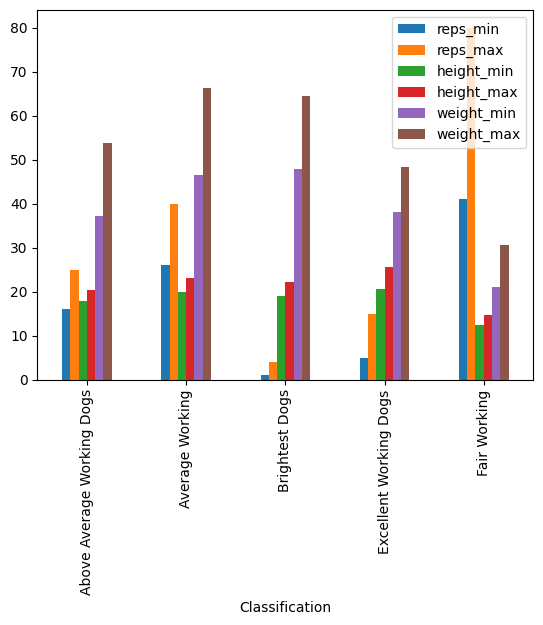

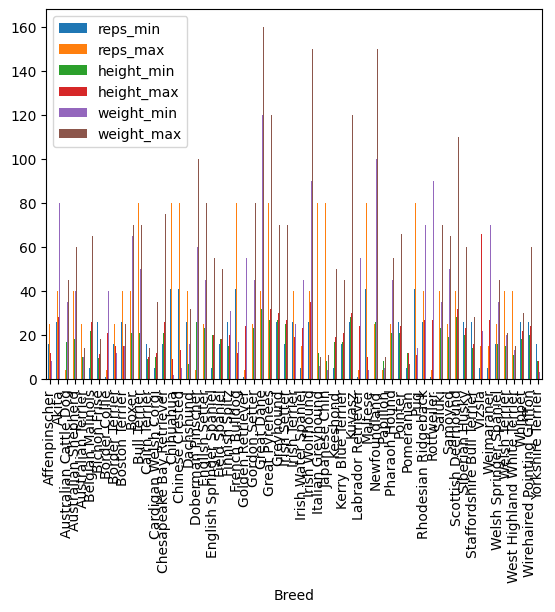

In [10]:
df_dog_breeds=pd.read_csv('A_dog_breeds.csv')
print('df_dog_breeds: ',df_dog_breeds.shape)

df_dog_intell_size=pd.read_csv('A_dog_intell_size.csv')
print('df_dog_intell_size: ',df_dog_intell_size.shape)

df_dog_merged = pd.merge(df_dog_breeds, df_dog_intell_size, on= "Breed")
print('df_dog_data: ',df_dog_merged.shape)

df_dog_merged.drop(['Height'], axis=1, inplace=True)
df_dog_merged.head(1)
# df_dog_merged.style

print()
print(df_dog_merged.columns)
print()
print(df_dog_merged.height_max.mean())
print()
print(df_dog_merged.groupby('Classification').height_max.mean())
print()
print(df_dog_merged[df_dog_merged.Breed=="Greyhound"].weight_max.mean())
print(df_dog_merged[df_dog_merged.Breed=="Boxer"].weight_max.mean())
print(df_dog_merged[df_dog_merged.Breed=="Pug"].weight_max.mean())
print(df_dog_merged[df_dog_merged.Breed=="Labrador Retriever"].weight_max.mean())
print()
print(df_dog_merged.groupby('Classification').weight_max.agg(['count', 'max', 'min', 'mean']))
print()
print(df_dog_merged.groupby('Classification').mean('reps_min'))
df_dog_merged.groupby('Classification').mean('reps_min').plot(kind='bar')
df_dog_merged.groupby('Breed').mean('reps_min').plot(kind='bar')

In [11]:
IQ = df_dog_merged["obey"]
IQ.head()

# df_IQ = IQ.loc[IQ["obey"] == '95%']

0    95%
1    30%
2    50%
3    95%
4    95%
Name: obey, dtype: object

In [12]:
IQ_Classification = df_dog_merged[["Breed","obey", "Classification", "height_min", "height_max", "weight_min", "weight_max"]]
# IQ_Classification = df_dog_merged[["obey", "Classification"]]
IQ_Classification

,Breed,obey,Classification,height_min,height_max,weight_min,weight_max
0,Labrador Retriever,95%,Brightest Dogs,21.0,24.0,55,80
1,Chihuahua,30%,Fair Working,6.0,9.0,2,5
2,Boxer,50%,Average Working,21.0,25.0,65,70
3,Golden Retriever,95%,Brightest Dogs,21.0,24.0,55,75
4,Golden Retriever,95%,Brightest Dogs,21.0,24.0,55,75
...,...,...,...,...,...,...,...
68,Whippet,50%,Average Working,18.0,22.0,27,30
69,Wirehaired Pointing Griffon,50%,Average Working,20.0,24.0,45,60
70,Yorkshire Terrier,70%,Above Average Working Dogs,8.0,8.0,3,7
71,Akita,50%,Average Working,26.0,28.0,80,120


In [13]:
IQ_Classification.shape

(73, 7)

In [14]:
rating = '95%'
print(f"Count of rows with a {rating} obey rating",len(IQ_Classification[IQ_Classification.obey == rating]))
IQ_Classification[IQ_Classification.obey == rating]

Count of rows with a 95% obey rating 9


,Breed,obey,Classification,height_min,height_max,weight_min,weight_max
0,Labrador Retriever,95%,Brightest Dogs,21.0,24.0,55,80
3,Golden Retriever,95%,Brightest Dogs,21.0,24.0,55,75
4,Golden Retriever,95%,Brightest Dogs,21.0,24.0,55,75
7,Rottweiler,95%,Brightest Dogs,22.0,27.0,90,110
24,Doberman Pinscher,95%,Brightest Dogs,26.0,28.0,60,100
35,Papillon,95%,Brightest Dogs,8.0,11.0,5,10
45,Australian Cattle Dog,95%,Brightest Dogs,17.0,20.0,35,45
46,Australian Cattle Dog,95%,Brightest Dogs,17.0,20.0,35,45
47,Border Collie,95%,Brightest Dogs,19.0,21.0,40,40


In [15]:
df_groupby = IQ_Classification.groupby('Classification')
df_groupby.mean("height_min")

,height_min,height_max,weight_min,weight_max
Classification,,,,
Above Average Working Dogs,17.789474,20.421053,37.210526,53.736842
Average Working,19.981481,23.055556,46.592593,66.185185
Brightest Dogs,19.111111,22.111111,47.777778,64.444444
Excellent Working Dogs,20.500000,25.625000,38.125000,48.375000
Fair Working,12.400000,14.600000,21.100000,30.600000


In [16]:
dogs = pd.read_csv(
"https://query.data.world/s/9zmgo15g5lvopy98cr4vatfxj")
dogs

,Breed,Classification,avgWeight,weight_high_lbs,weight_low_lbs
0,Chihuahua,Fair Working/Obedience Intelligence,3.5,5,2
1,Yorkshire Terrier,Above Average Working Dogs,5.0,7,3
2,Pomeranian,Excellent Working Dogs,5.0,7,3
3,Maltese,Fair Working/Obedience Intelligence,5.0,6,4
4,Papillon,Brightest Dogs,7.5,10,5
...,...,...,...,...,...
99,Irish Wolfhound,Average Working/Obedience Intelligence,120.0,150,90
100,Newfoundland,Above Average Working Dogs,125.0,150,100
101,Great Dane,Average Working/Obedience Intelligence,140.0,160,120
102,Saint Bernard,Fair Working/Obedience Intelligence,150.0,190,110
